In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/income.csv'

In [5]:
df = pd.read_csv(file_path)
df


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0.5, 0, 'Income($)')

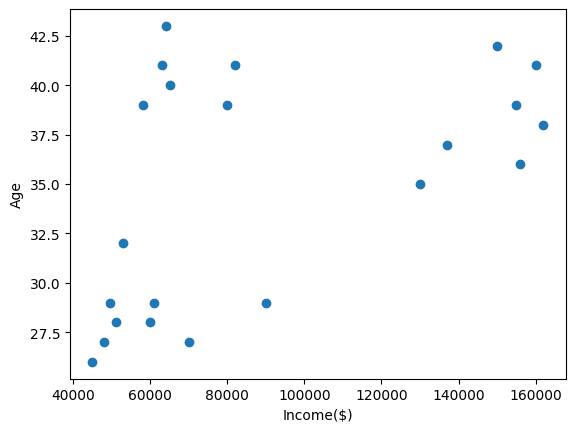

In [6]:
#scatterplot
plt.scatter(df['Income($)'],df.Age)
plt.ylabel('Age')
plt.xlabel('Income($)')

In [7]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Income($)','Age']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [8]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,2


In [9]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
print(df1)
print(df2)
print(df3)

     Name  Age  Income($)  cluster
4    Kory   42     150000        0
5  Gautam   39     155000        0
6   David   41     160000        0
7  Andrea   38     162000        0
8    Brad   36     156000        0
        Name  Age  Income($)  cluster
0        Rob   27      70000        1
1    Michael   29      90000        1
2      Mohan   29      61000        1
3     Ismail   28      60000        1
11       Tom   26      45000        1
12    Arnold   27      48000        1
13     Jared   28      51000        1
14     Stark   29      49500        1
15    Ranbir   32      53000        1
16    Dipika   40      65000        1
17  Priyanka   41      63000        1
18      Nick   43      64000        1
19      Alia   39      80000        1
20       Sid   41      82000        1
21     Abdul   39      58000        1
        Name  Age  Income($)  cluster
9   Angelina   35     130000        2
10    Donald   37     137000        2


Text(0, 0.5, 'Age')

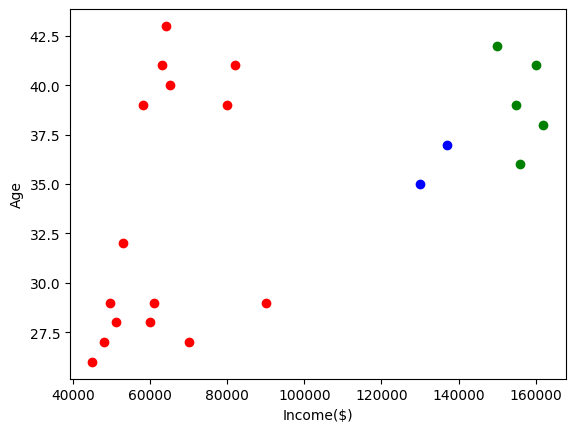

In [10]:
plt.scatter(df1['Income($)'],df1.Age,color='green')
plt.scatter(df2['Income($)'],df2.Age,color='red')
plt.scatter(df3['Income($)'],df3.Age,color='blue')
plt.xlabel('Income($)')
plt.ylabel('Age')

In [11]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [12]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


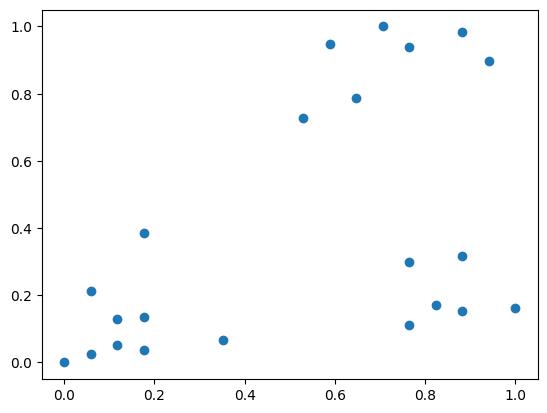

In [13]:
plt.scatter(df.Age,df['Income($)'])

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [15]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [16]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])